In [1]:
# Импорт библиотек

In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.metrics.regression import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns
import matplotlib.pyplot as plt



In [7]:
df = pd.read_csv('places.csv')

In [8]:
# Заголовки
df.head()

,Climate_and_Terrain,Housing,Health_Care_and_Environment,Crime,Transportation,Education,The_Arts,Recreation,Economics,Place
0,521,6200,237,923,4031,2757,996,1405,7633,Abilene_TX
1,575,8138,1656,886,4883,2438,5564,2632,4350,Akron_OH
2,468,7339,618,970,2531,2560,237,859,5250,Albany_GA
3,476,7908,1431,610,6883,3399,4655,1617,5864,Albany-Schenectady-Troy_NY
4,659,8393,1853,1483,6558,3026,4496,2612,5727,Albuquerque_NM


In [9]:
df.shape

(329, 10)

In [10]:
# Отделение целевого признака
y = df['Housing']
X = df[[x for x in df if x not in ('Housing', 'Place', 'Crime','Transportation', 'The_Arts', 'Economics')]]

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

In [11]:
# Линейнай  регрессия 

In [12]:
%%time
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
print(linreg)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Wall time: 997 µs


In [13]:
# среднеквадратичные ошибки линейной регрессии 
print("Mean squared error (train): %.10f" % mean_squared_error(y_train, linreg.predict(X_train_scaled)))

Mean squared error (train): 4225294.6795661375


In [15]:
linreg_coef = pd.DataFrame(
    {
        'feature': X.columns,
        'coef': linreg.coef_
    })
linreg_coef.sort_values(by='coef', ascending=False)

# Основной признак места - здравоохранение и окружающая среда

,feature,coef
1,Health_Care_and_Environment,859.978388
0,Climate_and_Terrain,737.268223
3,Recreation,550.548296
2,Education,-30.049070


In [17]:
%%time

# Lasso-регрессия

lasso1 = Lasso(alpha=0.01, random_state=17)
lasso1.fit(X_train_scaled, y_train)
print(lasso1)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=17,
   selection='cyclic', tol=0.0001, warm_start=False)
Wall time: 970 µs


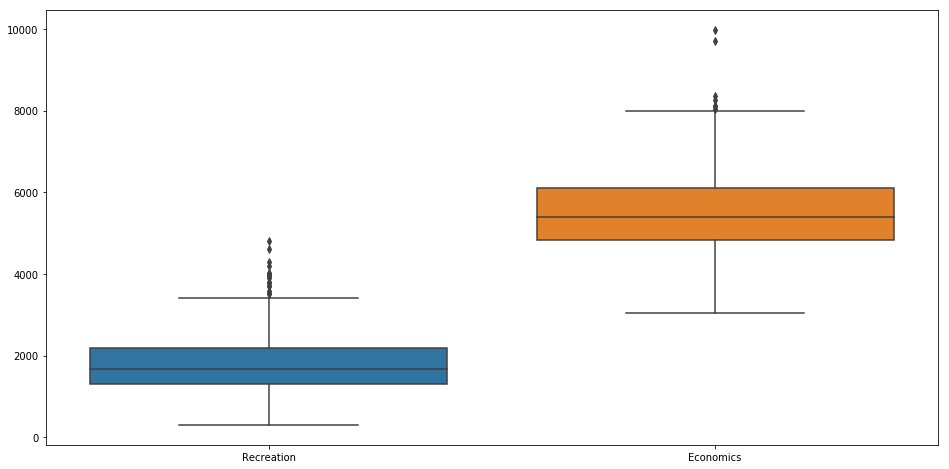

In [23]:
# Графики по числовым признакам без разбиения на классы
plt.figure(figsize=(16,8))
without_clases = df[[x for x in df if x not in ('Climate_and_Terrain', 'Housing','Health_Care_and_Environment', 'Crime', 'Transportation', 'Education', 'The_Arts')]]
sns.boxplot(data=without_clases);
plt.show()

<Figure size 864x432 with 0 Axes>

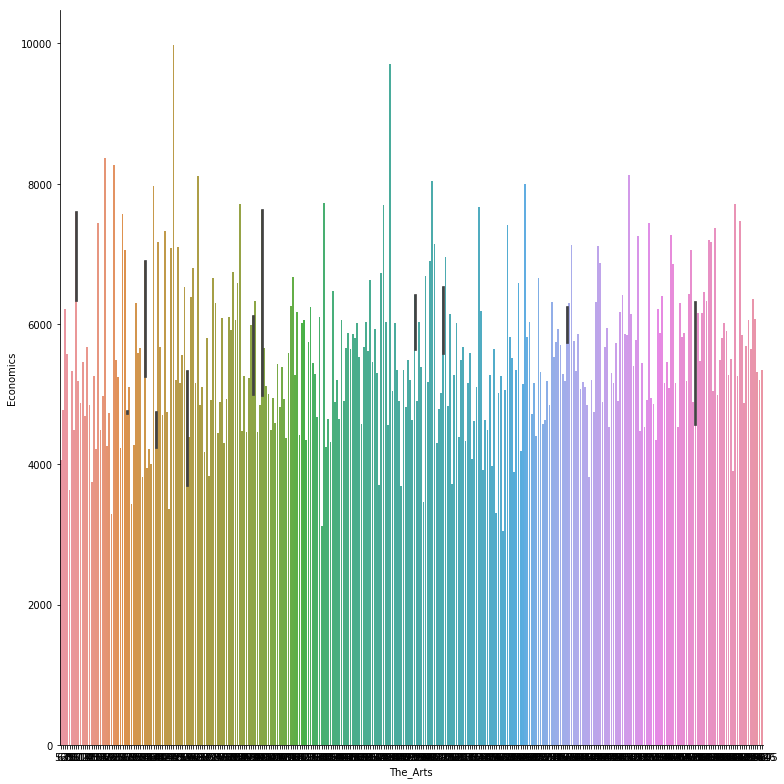

In [30]:
plt.figure(figsize=(12,6))
attack = df[[x for x in df if x not in ('Housing', 'Crime', 'Transportation', 'Education')]]
sns.catplot(x="The_Arts", y="Economics", data=attack, kind='bar', height=11, estimator=np.max);
plt.show()
